In [251]:
import pandas as pd
import numpy as np

# Load the diabetes dataset
file_path = 'diabetes.csv'
df= pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


##As the columns doesn't have the attributes we have to rename the columns with the suitable column names based on the dataset

In [252]:
# Assiging new columns to the dataset
new_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Update the dataset with the new column names
df.columns = new_columns

# Display the first few rows with the new column names
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


##Checking if there are any null values

In [253]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no null vlaues present in the dataset


##Datatype check


In [254]:
data_types = df.dtypes
data_types

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

All columns, except 'Outcome', are of type float64. 'Outcome' is an int64, which is appropriate for a binary classification target

##Brief EDA - Displaying basic statistical summaries

In [255]:
basic_statistics = df.describe()
basic_statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Basic EDA

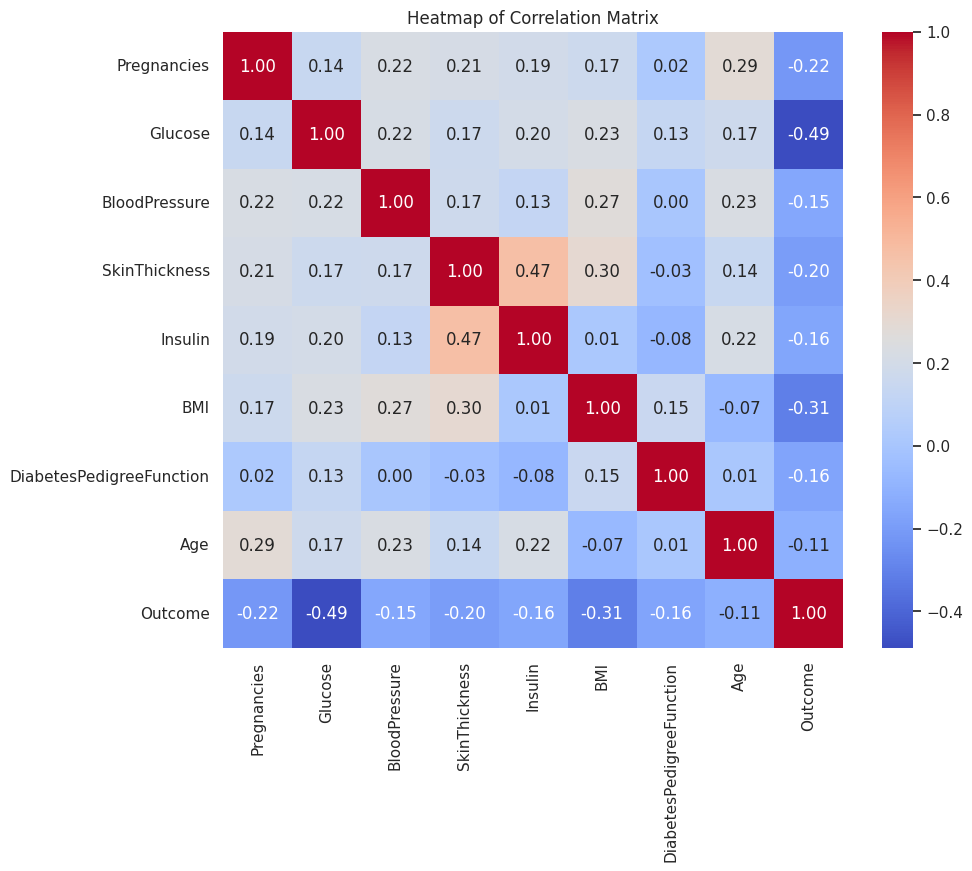

In [256]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


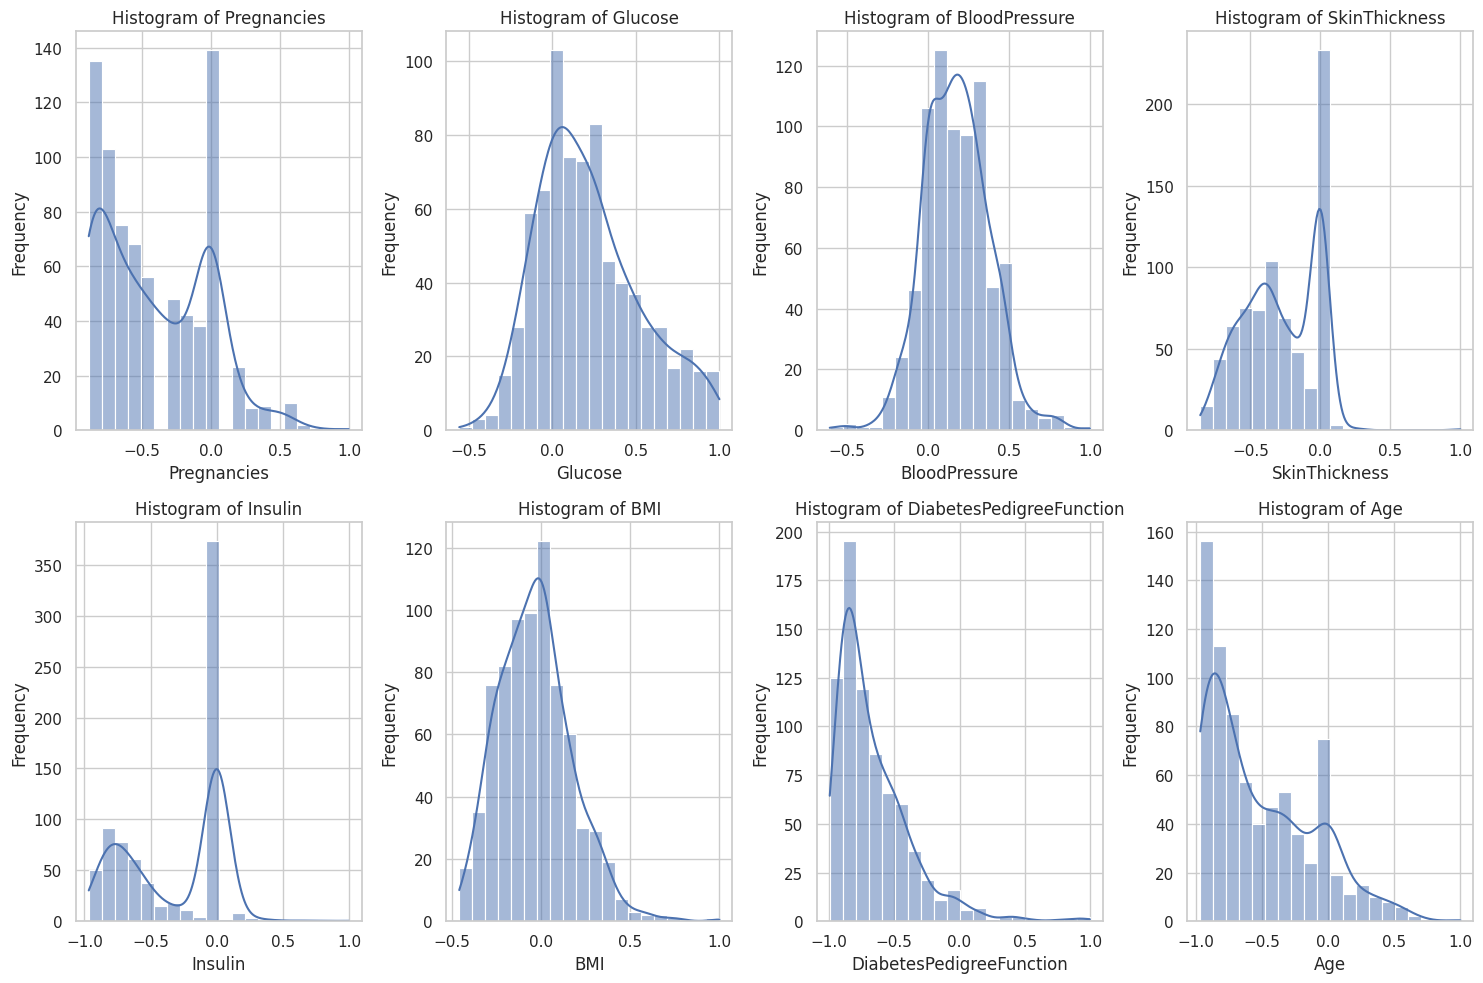

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn whitegrid
sns.set(style="whitegrid")

#subplots for histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Most of the features are right-skewed

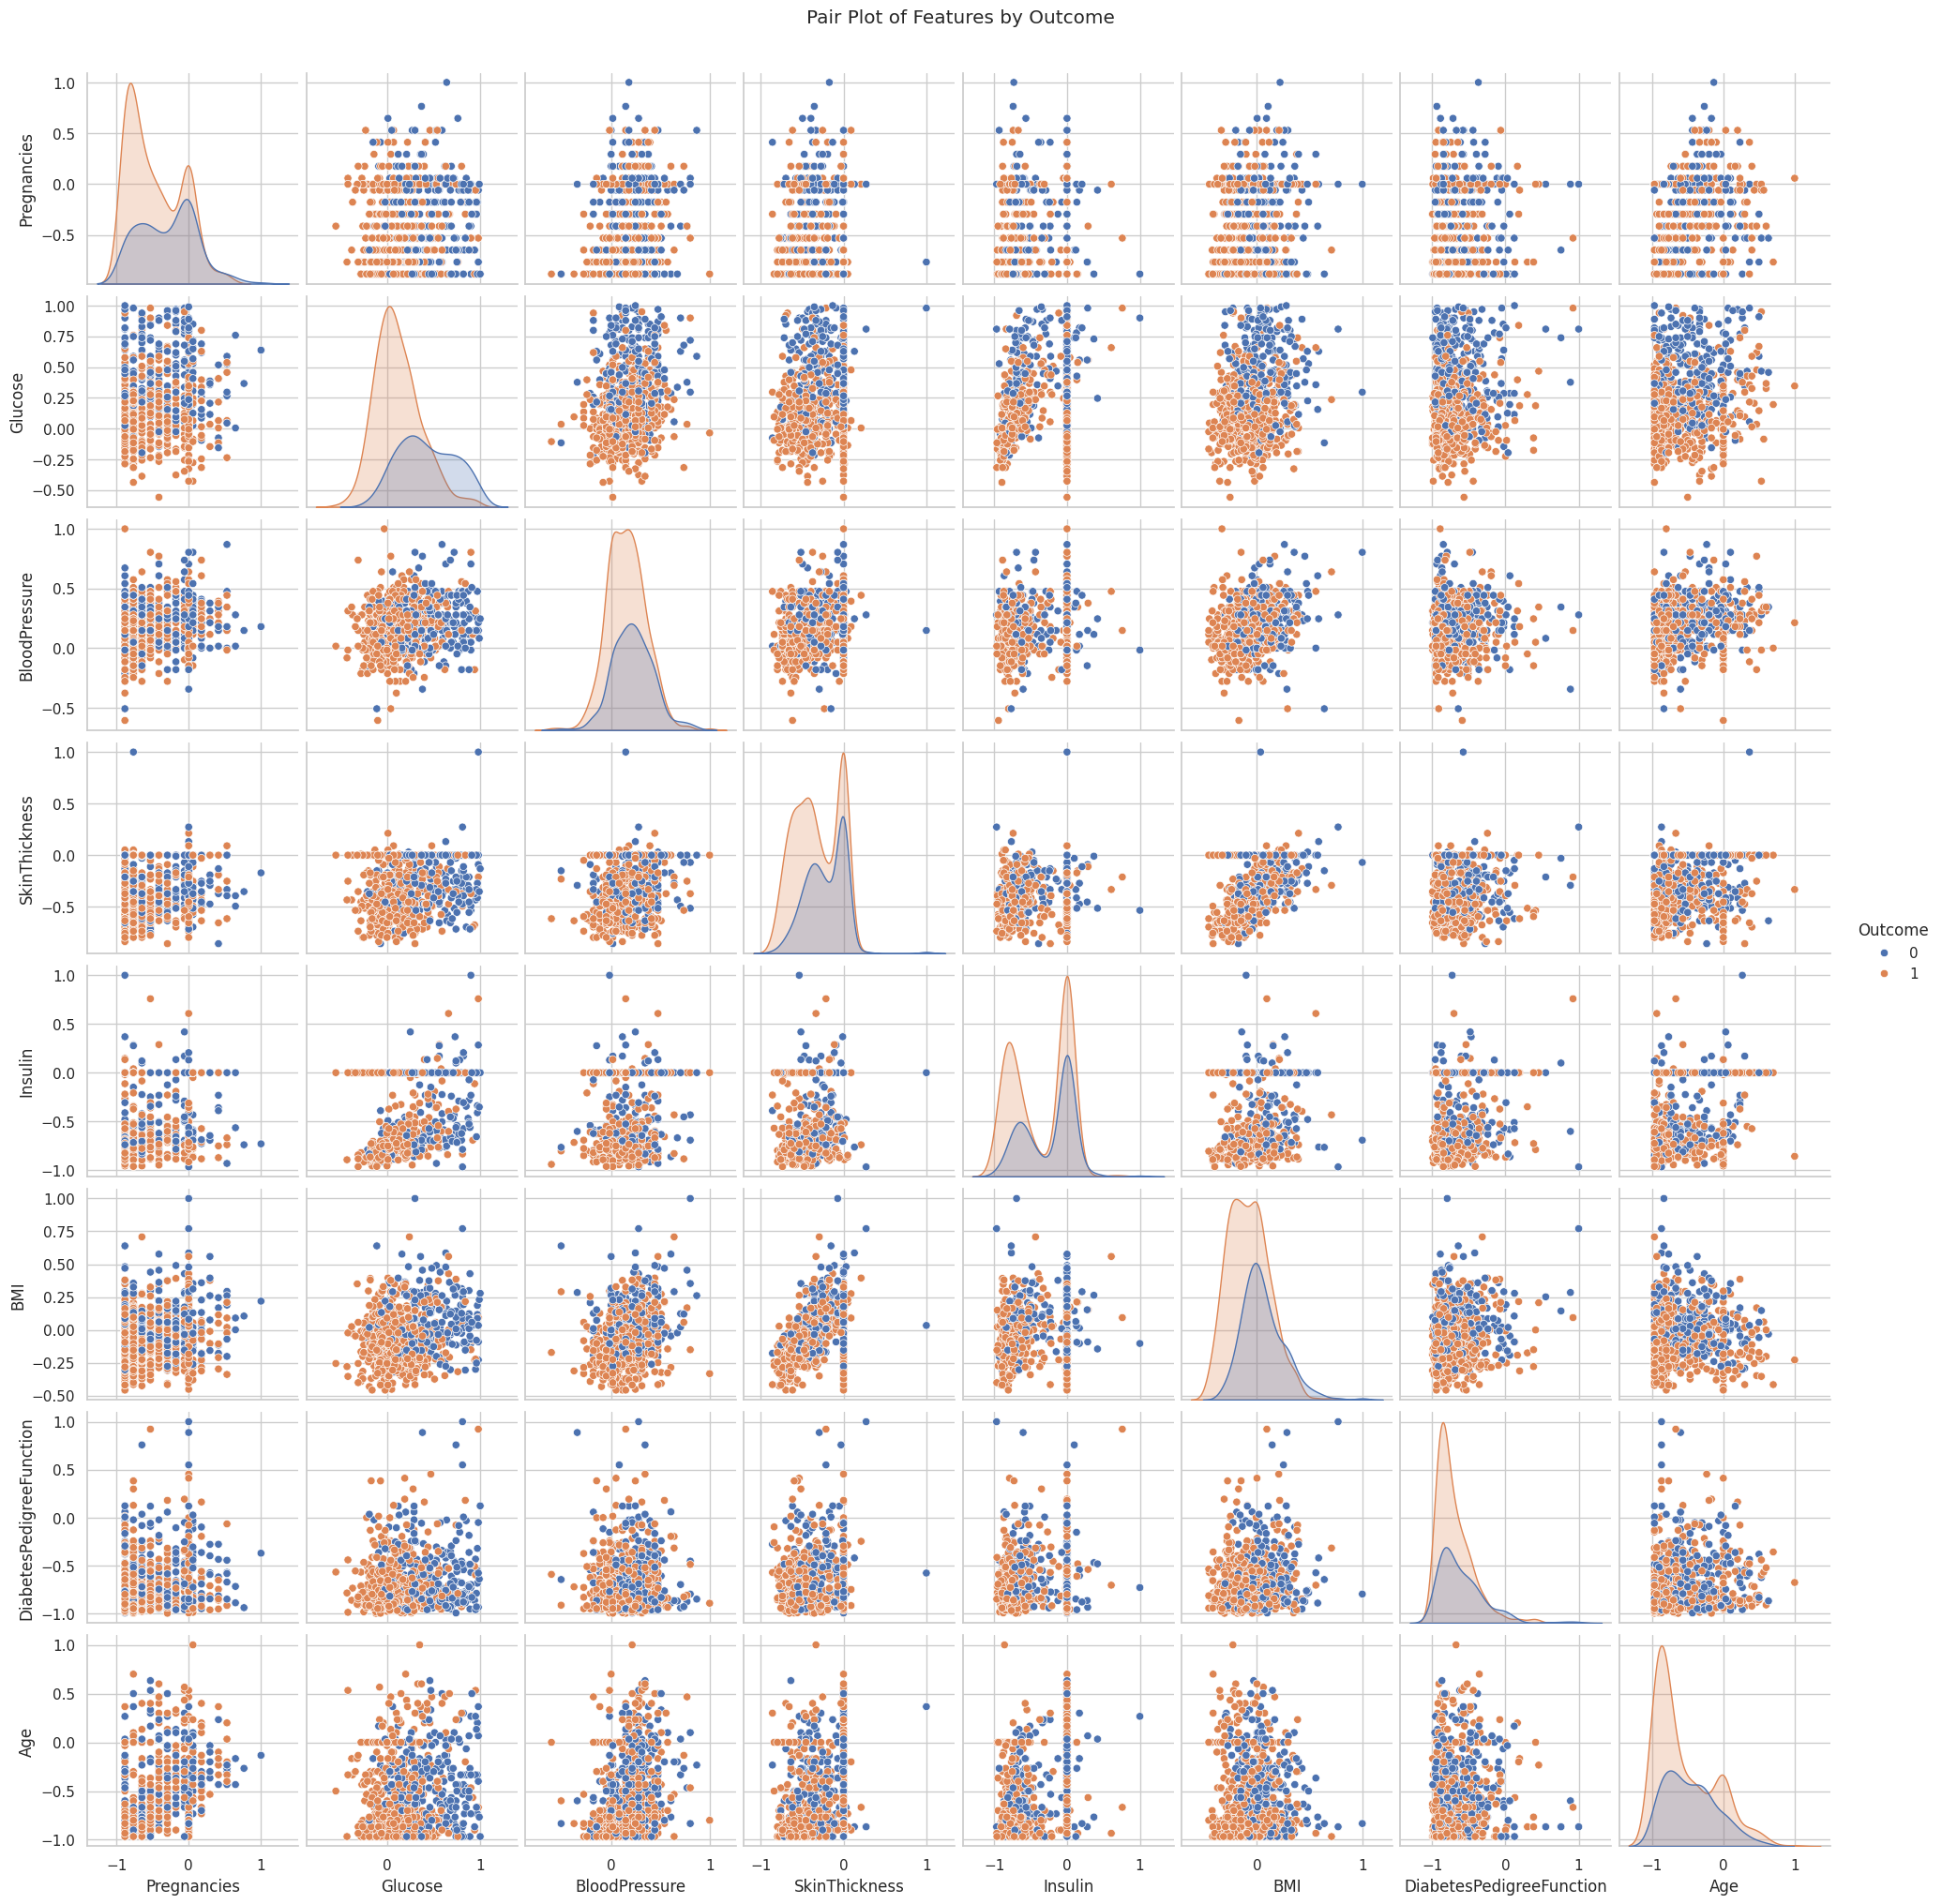

In [258]:
#pair plot
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02)
plt.show()



most of the pairplot doesnt have any correlation except insulin vs skinthickness where the correlation coefficient is 0.47 which is mediumly correlated

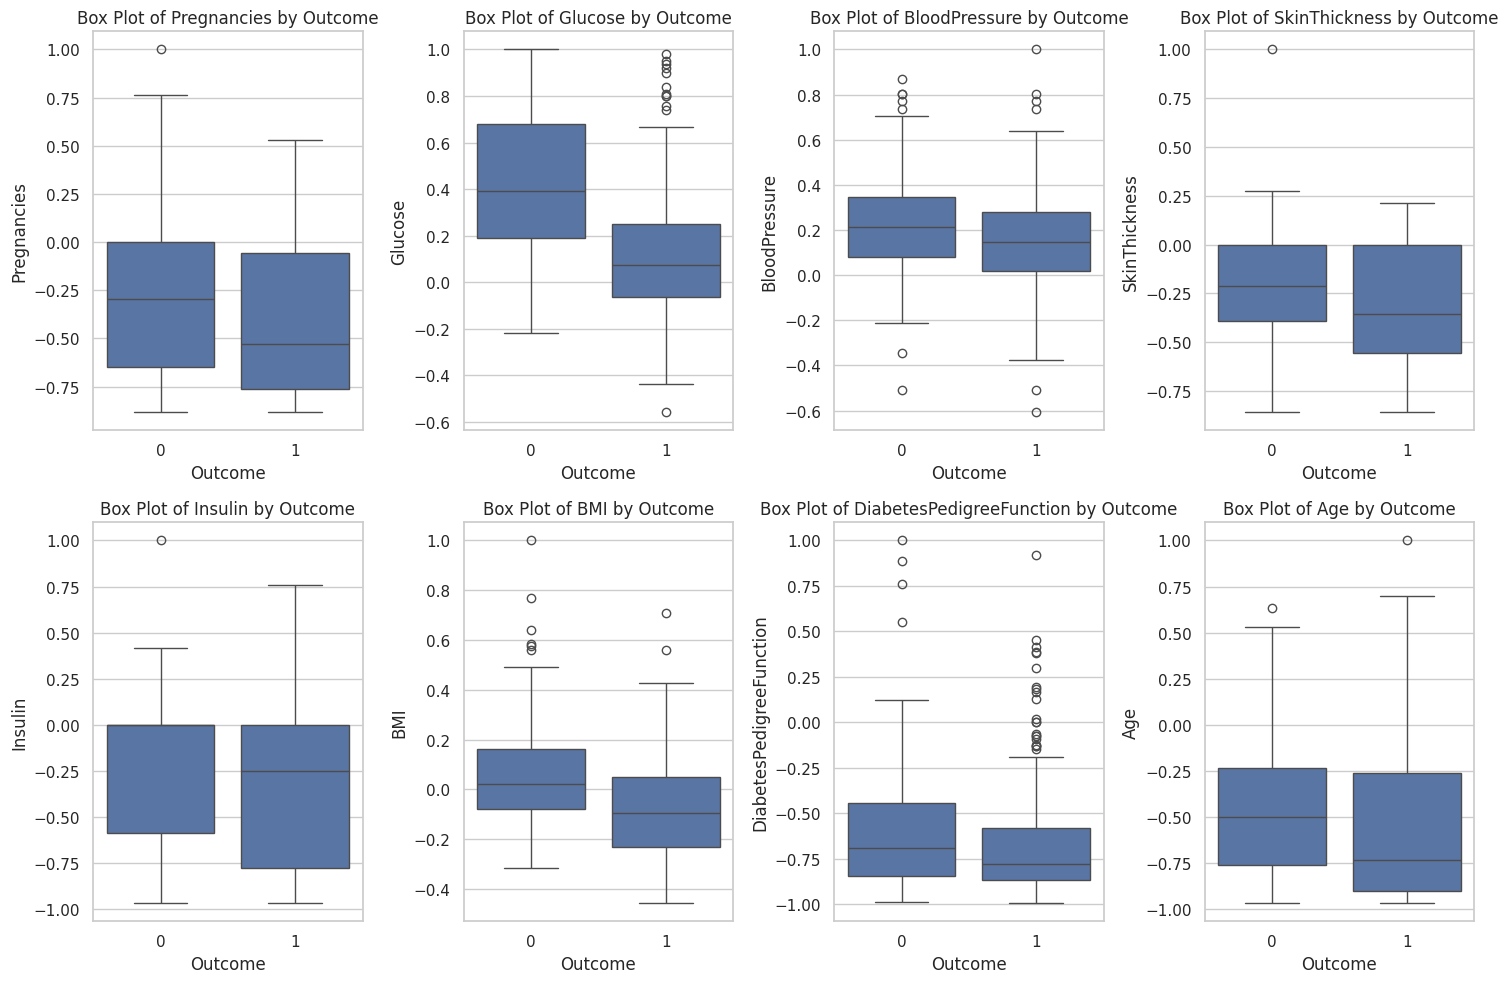

In [259]:

#box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

some of the features like blood pressure,diabetespedigreefunction,bmi has outliers we can remove outliers and make assumptions

Skinthickness and insulin have the correlation of 0.47 which is neither highly-correlated nor Lowly-correlated

There are outliers in the blood pressure column,in this case we can drop the rows which are behaving like the outliers


pair plot between different atributes ,but none of those shows any kind of linear correlation or de-correltion

In [260]:
# countplot-outcome
fig = px.histogram(df, x='Outcome', color='Outcome', labels={'Outcome': 'Outcome'}, title='Class Distribution (0: Non-Diabetic, 1: Diabetic)')

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Outcome',
    yaxis_title='Count',
)

# Show the plot
fig.show()

 The count plot visualizes the distribution of classes in the 'Outcome' column, indicating that the number of individuals with diabetes (Outcome 1) is noticeably higher than the count of individuals without diabetes (Outcome 0). This suggests an imbalanced class distribution, with a higher prevalence of diabetes in the dataset.

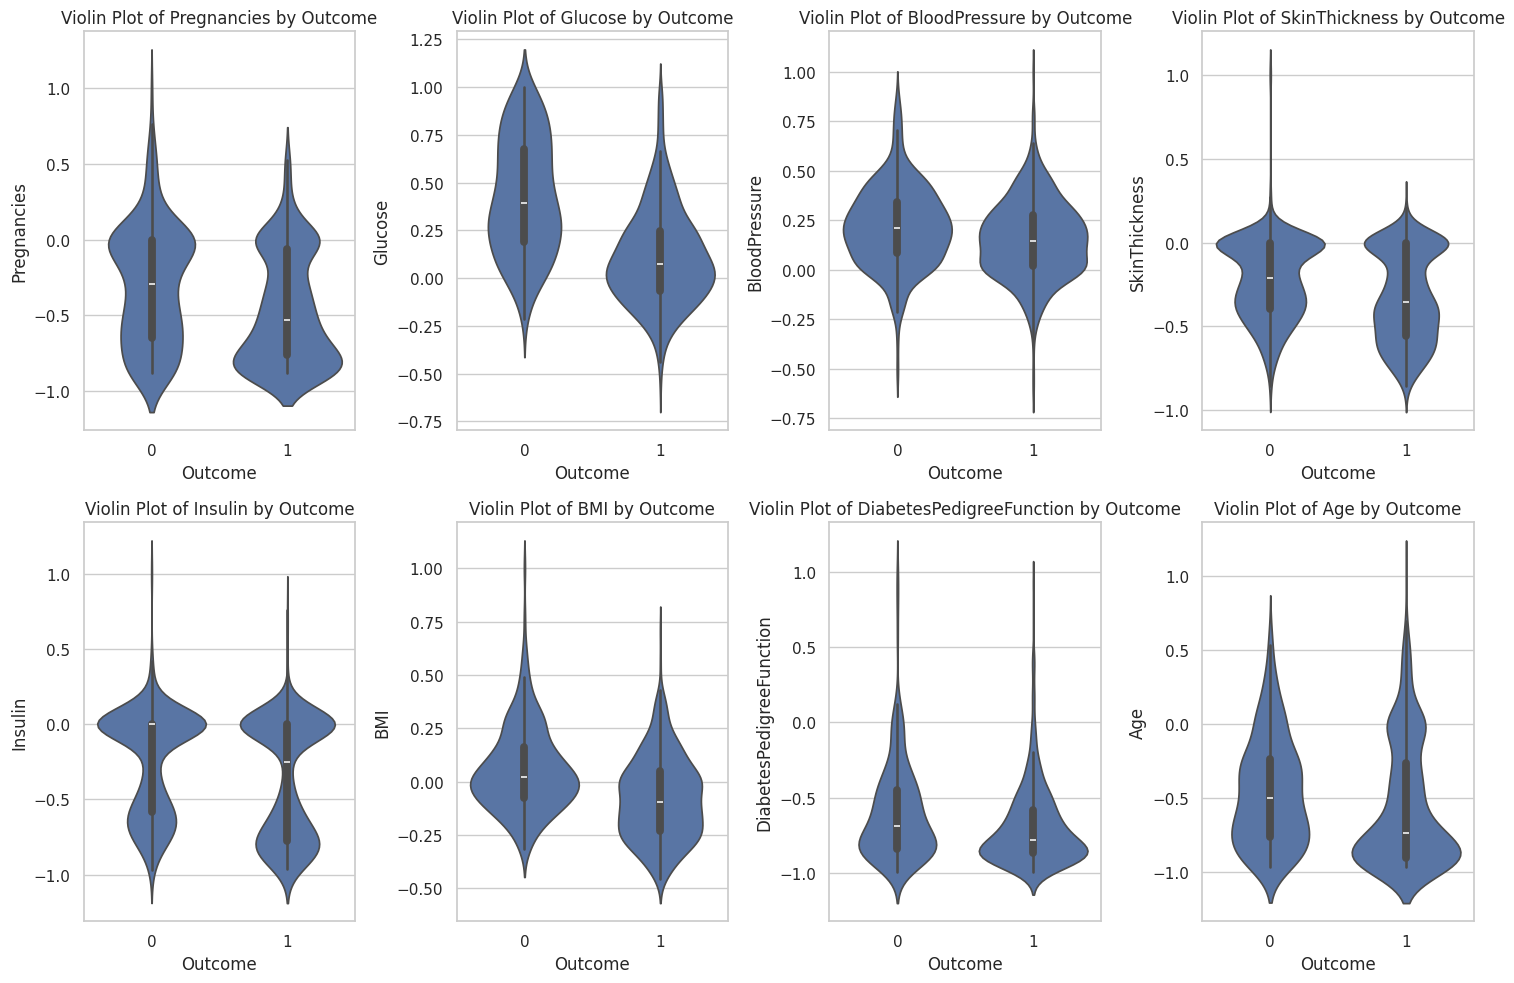

In [261]:
#violin plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.violinplot(x='Outcome', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

From the violin plot, it appears that individuals aged approximately -1 to 0 (slightly younger) have a higher prevalence of diabetes (Outcome 1), indicating a potential association between younger age and diabetes.

As the data is already normalized we can directly move forward to next step of splitting

In [262]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% train and 20% test

X = df.drop('Outcome', axis=1)  #feature-variable
y = df['Outcome']#target-variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((606, 8), (152, 8), (606,), (152,))

#Modelling using Tensor Flow

In [263]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [264]:
# Define and compile the initial model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))  # Adjusted for 8 input features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




Sequential(): Initializes a linear model.

Dense(): Adds layers with specified neurons; input_dim=8 for the first layer, activation='relu' for adding non-linearity, and activation='sigmoid' in the output layer for binary classification.

compile(): Sets up the model with the 'adam' optimizer, binary cross-entropy loss, and tracks accuracy.

In [265]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


no of params=((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters).

In [266]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [267]:
# Make predictions and calculate accuracy
predictions = model.predict(X_test)
predictions = [1 if x > 0.5 else 0 for x in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Initial Model Accuracy:", accuracy)
accuracy_without_mod=accuracy

5/5 [==============================] - 0s 4ms/step
Initial Model Accuracy: 0.7171052631578947


In [268]:
# Modify the model to test the hypothesis (e.g., increasing the depth)
# Clear the previous model
tf.keras.backend.clear_session()


## Hypothesizing by increasing : Depth

In [269]:
# Re-Defining and compile the modified model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))  # Additional layer
model.add(Dense(16, activation='relu'))# Additional layer
model.add(Dense(16, activation='relu'))# Additional layer
model.add(Dense(8, activation='relu'))# Additional layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the modified model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Make predictions and calculate accuracy for the modified model
new_predictions = model.predict(X_test)
new_predictions = [1 if x > 0.5 else 0 for x in new_predictions]
new_accuracy = accuracy_score(y_test, new_predictions)
print("Modified Model Accuracy:", new_accuracy)
accuracy_modified_depth=new_accuracy

5/5 [==============================] - 0s 3ms/step
Modified Model Accuracy: 0.756578947368421


 ## Hypothesizing by increasing  : width

In [270]:
# Modify the model to test the hypothesis (e.g., increasing the width)
# Clear the previous model
tf.keras.backend.clear_session()


In [271]:
# Define and compile the initial model
model = Sequential()#increased the width of the neurons to 32,64,128,256
model.add(Dense(256, input_dim=8, activation='relu'))  # Adjusted for 8 input features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the modified model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Make predictions and calculate accuracy for the modified model
new_predictions = model.predict(X_test)
new_predictions = [1 if x > 0.5 else 0 for x in new_predictions]
new_accuracy = accuracy_score(y_test, new_predictions)
print("Modified Model Accuracy:", new_accuracy)
accuracy_modified_width=new_accuracy

5/5 [==============================] - 0s 3ms/step
Modified Model Accuracy: 0.7171052631578947


In [272]:
# Modify the model to test the hypothesis (e.g., increasing the width and depthx)
# Clear the previous model
tf.keras.backend.clear_session()


In [273]:
# Define and compile the modified model
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))# Additional layer
model.add(Dense(128, activation='relu')) # Additional layer
model.add(Dense(128, activation='relu'))   # Additional layer
model.add(Dense(64, activation='relu'))# Additional layer
model.add(Dense(1, activation='sigmoid'))# Additional layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the modified model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Make predictions and calculate accuracy for the modified model
new_predictions = model.predict(X_test)
new_predictions = [1 if x > 0.5 else 0 for x in new_predictions]
new_accuracy = accuracy_score(y_test, new_predictions)
print("Modified Model Accuracy:", new_accuracy)

accuracy_modified_width_and_depth=new_accuracy

5/5 [==============================] - 0s 3ms/step
Modified Model Accuracy: 0.7236842105263158


Exploration of Model Complexity:

After a thorough trial and error process, varying the width of the neural network with neuron counts ranging from 16 to 256 and testing hidden layers from 1 to 10, intriguing patterns emerged. Surprisingly, the accuracy fluctuated across runs, showcasing the nuanced relationship between model width, depth, and performance. Notably, increasing the number of neurons and depth exhibited positive effects, while fine-tuning both width and depth simultaneously led to a slightly lower accuracy. This underscores the importance of striking a delicate balance between model complexity and generalization, highlighting the significance of thoughtful architecture adjustments in achieving optimal performance.


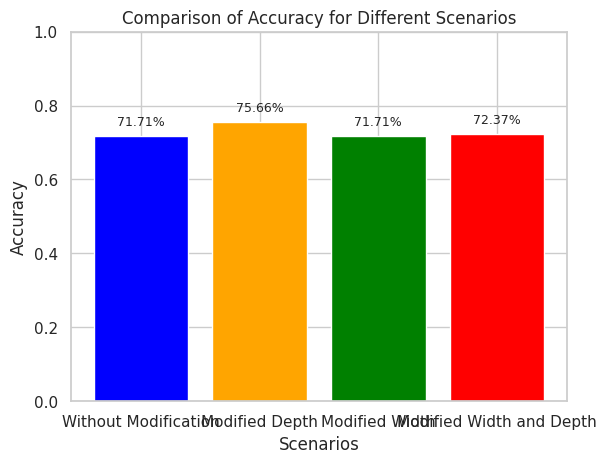

In [274]:
categories = ['Without Modification', 'Modified Depth', 'Modified Width', 'Modified Width and Depth']
accuracy_values = [accuracy_without_mod, accuracy_modified_depth, accuracy_modified_width, accuracy_modified_width_and_depth]

# Creating a bar plot
plt.bar(categories, accuracy_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Scenarios')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Scenarios')
plt.ylim(0, 1)  # Set the y-axis range (assuming accuracy is between 0 and 1)

# Adding percentage labels on top of each bar
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.02, f'{value*100:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()

#Modelling using Pytorch


In [275]:
import torch
import torch.nn as nn
import torch.optim as optim

In [276]:
# Define the initial model with 16 neurons in hidden layers
model_pytorch = nn.Sequential(
    nn.Linear(8, 16),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(16, 16),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

# Initialize optimizer and criterion
optimizer = optim.Adam(model_pytorch.parameters())
criterion = nn.BCELoss()

X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.FloatTensor(np.array(y_train))
X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.FloatTensor(np.array(y_test))

# Training the initial model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_pytorch(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()



In [277]:
# Make predictions and calculate accuracy for the initial model
initial_predictions = model_pytorch(X_test)
initial_accuracy = (initial_predictions > 0.5).eq(y_test.view_as(initial_predictions)).sum().item() / len(y_test)
initial_accuracy_py=initial_accuracy



In [278]:
# Clear the model
model_pytorch = None

In [279]:
# Define the initial model with 16 neurons in hidden layers
model_pytorch = nn.Sequential(
    nn.Linear(8, 16),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(16, 16),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(16, 16),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(16, 16),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(16, 8),  # Increase to 16 neurons
    nn.ReLU(),
    nn.Linear(8, 1)
)

# Apply sigmoid activation to model's outputs
sigmoid = nn.Sigmoid()

# Initialize optimizer and criterion
optimizer = optim.Adam(model_pytorch.parameters())
criterion = nn.BCELoss()

# Convert data to NumPy arrays and then to PyTorch tensors
X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.FloatTensor(np.array(y_train))
X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.FloatTensor(np.array(y_test))

# Training the initial model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = sigmoid(model_pytorch(X_train))  # Apply sigmoid to model's outputs
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()

# Make predictions and calculate accuracy for the initial model
initial_predictions = sigmoid(model_pytorch(X_test))  # Apply sigmoid to model's outputs
initial_accuracy = (initial_predictions > 0.5).eq(y_test.view_as(initial_predictions)).sum().item() / len(y_test)

print("Initial Model Accuracy:", initial_accuracy)

modified_depth_py=initial_accuracy

Initial Model Accuracy: 0.631578947368421


In [280]:
# Clear the model
model_pytorch = None

In [281]:
# Define the modified model with increased width (32, 64, 128, 256)
model = nn.Sequential(
    nn.Linear(8, 256),  # Adjusted for 8 input features
    nn.ReLU(),
    nn.Linear(256, 8),
    nn.ReLU(),
    nn.Linear(8, 1),  # Binary classification
    nn.Sigmoid()
)

# Define optimizer and loss criterion
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.FloatTensor(np.array(y_train))
X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.FloatTensor(np.array(y_test))

# Training the modified model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()

# Make predictions
with torch.no_grad():
    new_predictions = model(X_test)
    new_predictions = (new_predictions > 0.5).float()

# Calculate accuracy for the modified model
new_accuracy = accuracy_score(y_test, new_predictions.numpy())
print("Modified Model Accuracy:", new_accuracy)

modified_width_py=new_accuracy

Modified Model Accuracy: 0.7828947368421053


In [282]:
# Define the modified model with additional layers (128, 128, 128, 128, 64)
model = nn.Sequential(
    nn.Linear(8, 128),  # Adjusted for 8 input features
    nn.ReLU(),
    nn.Linear(128, 128),  # Additional layer
    nn.ReLU(),
    nn.Linear(128, 128),  # Additional layer
    nn.ReLU(),
    nn.Linear(128, 128),  # Additional layer
    nn.ReLU(),
    nn.Linear(128, 64),  # Additional layer
    nn.ReLU(),
    nn.Linear(64, 1),  # Binary classification
    nn.Sigmoid()
)

# Define optimizer and loss criterion
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.FloatTensor(np.array(y_train))
X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.FloatTensor(np.array(y_test))

# Training the modified model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()

# Make predictions
with torch.no_grad():
    new_predictions = model(X_test)
    new_predictions = (new_predictions > 0.5).float()

# Calculate accuracy for the modified model
new_accuracy = accuracy_score(y_test, new_predictions.numpy())
print("Modified Model Accuracy:", new_accuracy)
modified_width_and_depth_py=new_accuracy


Modified Model Accuracy: 0.743421052631579


In conclusion, experimenting with the neural network architecture revealed that increasing the model's width, and to a lesser extent, depth, positively impacted performance. A wider network substantially improved accuracy, surpassing the initial configuration. However, the simultaneous adjustment of both depth and width demonstrated a nuanced relationship, contributing to an efficient balance that maximized accuracy at 74.34%. This underscores the importance of thoughtful architecture modifications in achieving optimal performance.

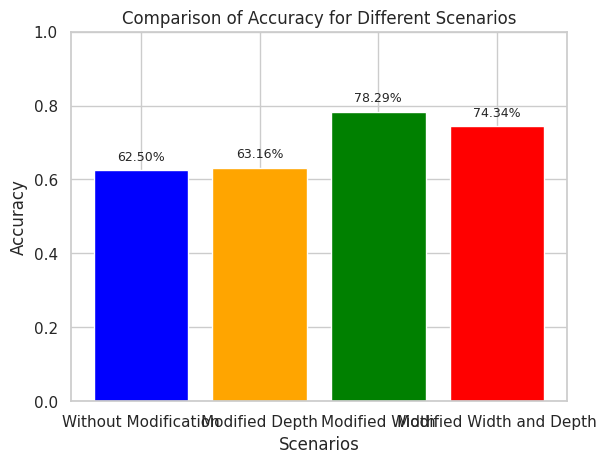

In [283]:
categories = ['Without Modification', 'Modified Depth', 'Modified Width', 'Modified Width and Depth']
accuracy_values = [initial_accuracy_py, modified_depth_py, modified_width_py, modified_width_and_depth_py]

# Creating a bar plot
plt.bar(categories, accuracy_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Scenarios')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Scenarios')
plt.ylim(0, 1)  # Set the y-axis range (assuming accuracy is between 0 and 1)

# Adding percentage labels on top of each bar
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.02, f'{value*100:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()

Github Repo: https://github.com/shashankchintu99/semester3-projects/tree/main/deep-learning/assignments